In [ ]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Set some display options for pandas
pd.set_option('display.max_columns', 50)

# --- Load the datasets ---
# The file paths assume your notebook is in the 'notebooks' folder
# and the data is in the 'data' folder at the same level.
customers = pd.read_csv('../data/olist_customers_dataset.csv')
orders = pd.read_csv('../data/olist_orders_dataset.csv')
order_items = pd.read_csv('../data/olist_order_items_dataset.csv')
payments = pd.read_csv('../data/olist_order_payments_dataset.csv')
products = pd.read_csv('../data/olist_products_dataset.csv')
translations = pd.read_csv('../data/product_category_name_translation.csv')

After loading, inspect each DataFrame. For each one, run df.head(), df.info(), and df.isnull().sum() to understand its structure, data types, and missing values.

#Check this dataframes

Check customers df

In [2]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
customers.shape

(99441, 5)

In [8]:
customers.duplicated().sum()

np.int64(0)

In [4]:
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

check Orders df

In [6]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
orders.shape

(99441, 8)

In [9]:
orders.duplicated().sum()

np.int64(0)

In [12]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Check order_items

In [13]:
order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [14]:
order_items.duplicated().sum()

np.int64(0)

Check payments

In [15]:
payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Check products

In [16]:
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Check translations

In [17]:
translations.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [18]:
translations.duplicated().sum()

np.int64(0)

Critical Thinking Question for yourself: Look at the orders table. It has a lot of date columns. Do any of them have missing values? Why might that be? (Hint: order_delivered_customer_date might be null if an order was cancelled or is still in transit)

Step 4: Merge the DataFrames

Our goal is a single, unified DataFrame. The key is to merge them step-by-step.

In [19]:
# --- Merge the datasets ---

# Start with orders and merge with customers
df = pd.merge(orders, customers, on='customer_id')

# Merge with order_items
# An order can have multiple items, so this will expand the dataframe
df = pd.merge(df, order_items, on='order_id')

# Merge with products
df = pd.merge(df, products, on='product_id')

# Merge with payments
# For simplicity, we can aggregate payments per order first
# Or merge directly and handle multiple payment methods later. Let's aggregate.
order_payments_agg = payments.groupby('order_id')['payment_value'].sum().reset_index()
df = pd.merge(df, order_payments_agg, on='order_id')

# Merge with translations to get English category names
df = pd.merge(df, translations, on='product_category_name', how='left')


# --- Display the merged dataframe ---
print("Merged DataFrame Info:")
df.info()
df.head()

Merged DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112647 entries, 0 to 112646
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112647 non-null  object 
 1   customer_id                    112647 non-null  object 
 2   order_status                   112647 non-null  object 
 3   order_purchase_timestamp       112647 non-null  object 
 4   order_approved_at              112632 non-null  object 
 5   order_delivered_carrier_date   111453 non-null  object 
 6   order_delivered_customer_date  110193 non-null  object 
 7   order_estimated_delivery_date  112647 non-null  object 
 8   customer_unique_id             112647 non-null  object 
 9   customer_zip_code_prefix       112647 non-null  int64  
 10  customer_city                  112647 non-null  object 
 11  customer_state                 112647 non-null  object 
 12  order_i

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_value,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,38.71,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,141.46,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,179.12,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,72.20,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,28.62,stationery


Handle Missing Values:

Look at df.isnull().sum(). The product_category_name_english and other product-related columns might have nulls. Decide on a strategy. For now, we can fill them with "unknown".

Many date columns will have missing values. This is okay for now, as we only need order_purchase_timestamp.

Convert Data Types: The date columns are loaded as object (strings). We must convert them to datetime objects to perform calculations.

In [20]:
df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1603
product_name_lenght              1603
product_description_lenght       1603
product_photos_qty               1603
product_weight_g                   18
product_length_cm                  18
product_height_cm                  18
product_width_cm                   18
payment_valu

In [21]:
# --- Clean and convert data types ---

# Fill missing product category names
df['product_category_name_english'].fillna('unknown', inplace=True)

# Convert date columns to datetime objects
date_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

for col in date_columns:
    df[col] = pd.to_datetime(df[col])

# Verify the changes
print("\nInfo after type conversion:")
df.info()

C:\Users\abhis\AppData\Local\Temp\ipykernel_12316\2911950152.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['product_category_name_english'].fillna('unknown', inplace=True)



Info after type conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112647 entries, 0 to 112646
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112647 non-null  object        
 1   customer_id                    112647 non-null  object        
 2   order_status                   112647 non-null  object        
 3   order_purchase_timestamp       112647 non-null  datetime64[ns]
 4   order_approved_at              112632 non-null  datetime64[ns]
 5   order_delivered_carrier_date   111453 non-null  datetime64[ns]
 6   order_delivered_customer_date  110193 non-null  datetime64[ns]
 7   order_estimated_delivery_date  112647 non-null  datetime64[ns]
 8   customer_unique_id             112647 non-null  object        
 9   customer_zip_code_prefix       112647 non-null  int64         
 10  customer_city                  112647 n

#Step 6: Initial Exploratory Data Analysis (EDA)

What is the distribution of order statuses?

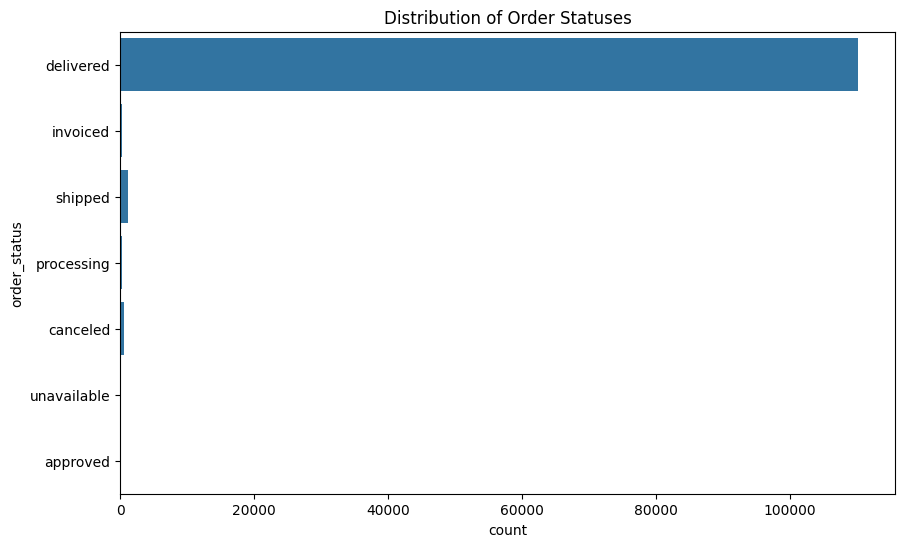

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(y=df['order_status'])
plt.title('Distribution of Order Statuses')
plt.show()

Insight: You'll notice the vast majority are 'delivered'. For our analysis, we should probably filter for only delivered orders to ensure we are analyzing completed transactions.

What are the most popular product categories?

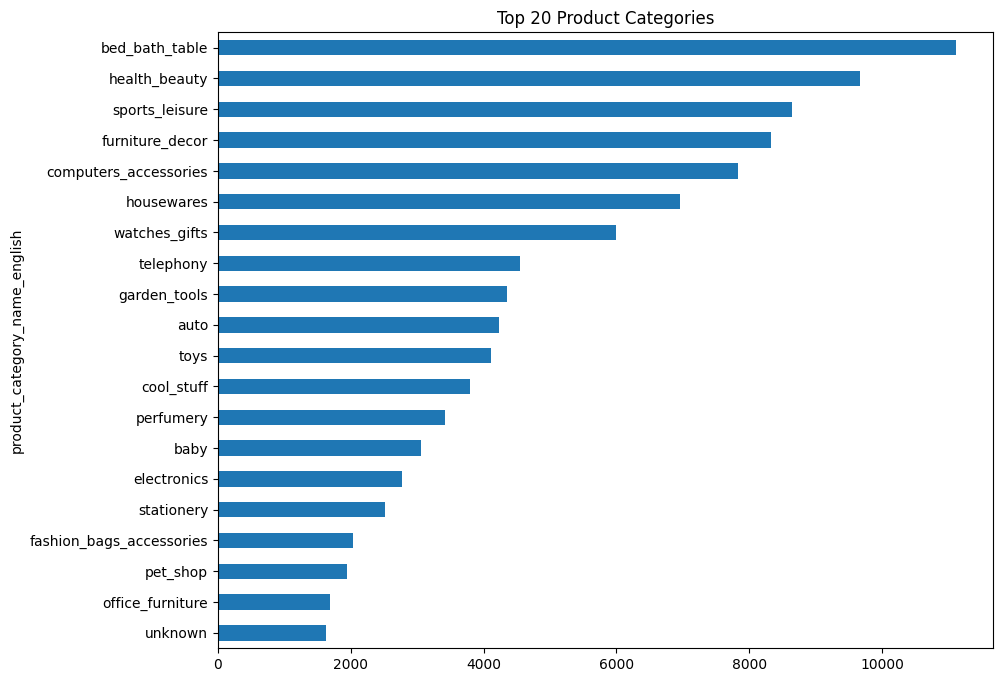

In [23]:
plt.figure(figsize=(10, 8))
df['product_category_name_english'].value_counts().nlargest(20).plot(kind='barh').invert_yaxis()
plt.title('Top 20 Product Categories')
plt.show()